In [109]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [4]:
#Import data file into notebook
data = pd.read_csv("../Data/forestfires.csv")

# Forest Fires - Data Analysis 

---

### Introduction. 
<p>Fires happen when ignition (from a lightning strike or a careless bonfire, for example) meets available fuel (such as dry vegetation), and warm, dry air fans the flames.
</p>

<p>That’s why the fire season tends to coincide with high temperatures and dry conditions. In the eastern U.S., fire season lasts from March through May, while the West sees most of its fire activity from June through October. </p>


Fires are an important and necessary part of the lifecycle for many different kinds of ecosystems. For as long as forests and grasslands have grown on earth, fires have burned them. In fact, some tree species, like lodgepole pines and aspens, need fire to stimulate their growth.

Fires have also been used by people as a way to manage lands, whether to clear land for farming, get rid of unwanted pests, or to restore nutrients to the soil.


  1. `X` - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
  2. `Y` - y-axis spatial coordinate within the Montesinho park map: 2 to 9
  3. `month` - month of the year: "jan" to "dec" 
  4. `day` - day of the week: "mon" to "sun"
  5. `FFMC` - FFMC index from the FWI system: 18.7 to 96.20.  https://wikifire.wsl.ch/tiki-index91f7.html?page=Fine+fuel+moisture+code
  6. `DMC` - DMC index from the FWI system: 1.1 to 291.3 https://wikifire.wsl.ch/tiki-index9436.html?page=Duff+moisture+code
  7. `DC` - DC index from the FWI system: 7.9 to 860.6 
  8. `ISI` - ISI index from the FWI system: 0.0 to 56.10
  9. `temp` - temperature in Celsius degrees: 2.2 to 33.30
  10. `RH` - relative humidity in %: 15.0 to 100
  11. `wind` - wind speed in km/h: 0.40 to 9.40 
  12. `rain` - outside rain in mm/m2 : 0.0 to 6.4 
  13. `area` - the burned area of the forest (in ha): 0.00 to 1090.84  

In [5]:
#preview dataset 
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [6]:
data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [7]:
data.shape

(517, 13)

In [8]:
data.info

<bound method DataFrame.info of      X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]>

In [9]:
#Preview dataframe columns
data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [10]:
# How many unique values per column
data.nunique()

X          9
Y          7
month     12
day        7
FFMC     106
DMC      215
DC       219
ISI      119
temp     192
RH        75
wind      21
rain       7
area     251
dtype: int64

In [11]:
# Display the object type of data information.

data.describe(include=['O'])

#all months and days are accounted for, which makes sense

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [12]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [13]:
# These numbers appear to be legitimate at first glance, individual distributions will be analyzed

In [14]:
#check for the sum of all null values
data.isnull().sum()

#no null values within this dataset

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [15]:
#Check for duplicate values
data.duplicated().sum()

#Remove duplicate rows/data

4

In [16]:
#drop duplicated columns
clean_data = data.drop_duplicates()

#Check to see 4 duplicate rows were removed
clean_data.shape

(513, 13)

Checking to see if the timeline of this data can be located. See link below:
https://nycdatascience.com/blog/student-works/data-analysis-of-forest-fire-montesinho-natural-park/

From this website date range for this data is January 2000 to December 2003

In [17]:
#Making a new columns with numerical days and months as well as a date column

day_mapping = {'mon': 0, 'tue': 1, 'wed': 2, 'thu': 3, 'fri': 4, 'sat': 5, 'sun': 6}
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

In [18]:
clean_data['month_num']=clean_data['month'].map(month_mapping)
clean_data['day_num']=clean_data['day'].map(day_mapping)

C:\Users\user\AppData\Local\Temp\ipykernel_26152\1388035913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['month_num']=clean_data['month'].map(month_mapping)
C:\Users\user\AppData\Local\Temp\ipykernel_26152\1388035913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['day_num']=clean_data['day'].map(day_mapping)


In [19]:
#Verify changes have been made and new column has been made

clean_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,3,4
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,10,1
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,10,5
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,3,4
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,8,6
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,8,6
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,8,6
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,8,5


In [20]:
#create a new column for 'area' where 'area' is converted to squared km
#1 hectare = 0.01 squared km

import math
clean_data['area_squared_km'] = clean_data['area'] * 0.01

C:\Users\user\AppData\Local\Temp\ipykernel_26152\3797116708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['area_squared_km'] = clean_data['area'] * 0.01


In [21]:
clean_data.dtypes

X                    int64
Y                    int64
month               object
day                 object
FFMC               float64
DMC                float64
DC                 float64
ISI                float64
temp               float64
RH                   int64
wind               float64
rain               float64
area               float64
month_num            int64
day_num              int64
area_squared_km    float64
dtype: object

In [22]:
#Create new column with spread

clean_data['fire_spread'] = clean_data['area_squared_km'] 

C:\Users\user\AppData\Local\Temp\ipykernel_26152\2248922252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['fire_spread'] = clean_data['area_squared_km']


In [23]:
# Create bins

# large fire is 2 squared-km as per website: https://www.epa.gov/climate-indicators/climate-change-indicators-wildfires
# 0 = minimal spread, 1 = moderate spread, 2= large spread

bins = [0, 0.001, 0.065700, 11]
labels = ['0', '1', '2']

clean_data['fire_spread'] = pd.cut(clean_data['fire_spread'], bins, labels=labels)

print(clean_data)

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

     month_num  day_num  area_squared_km fire_sprea

C:\Users\user\AppData\Local\Temp\ipykernel_26152\3788578603.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['fire_spread'] = pd.cut(clean_data['fire_spread'], bins, labels=labels)


In [24]:
#fill 0 with 0
clean_data['fire_spread'] = clean_data['fire_spread'].fillna('0')

C:\Users\user\AppData\Local\Temp\ipykernel_26152\854909942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['fire_spread'] = clean_data['fire_spread'].fillna('0')


In [25]:
clean_data = clean_data.astype({"fire_spread": int})

<Axes: ylabel='Count'>

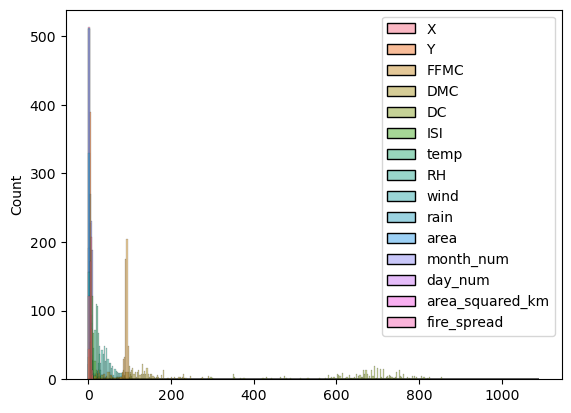

In [26]:
#Make seperate histograms to see distribution
sns.histplot(clean_data)  #can make bins

<Axes: >

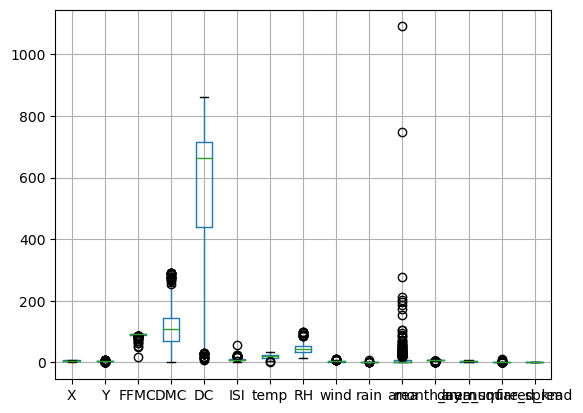

In [27]:
#look for outliers
clean_data.boxplot()

<Axes: ylabel='Count'>

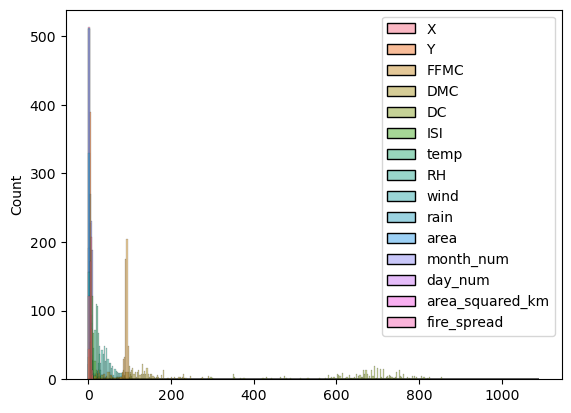

In [28]:
#columns x, y, month, day are all expected. Look into FFMC, DMC, DC, ISI, temp, RH, wind, rain, area
sns.histplot(clean_data)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num,area_squared_km,fire_spread
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.0,1,6,0.0,0


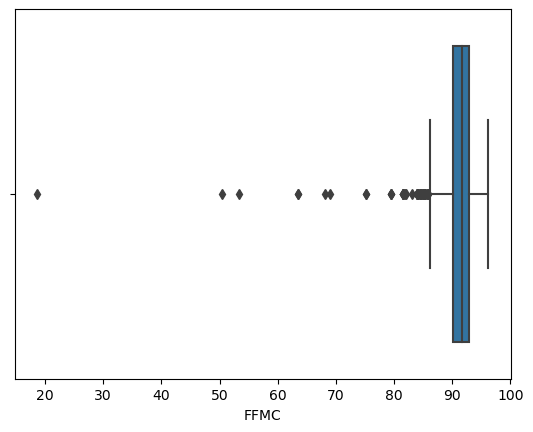

In [29]:
#Make seperate histograms to see distribution
sns.boxplot(data= clean_data, x ='FFMC') 

#Look into outlier point
clean_data.loc[clean_data['FFMC']<30]

<Axes: xlabel='fire_spread'>

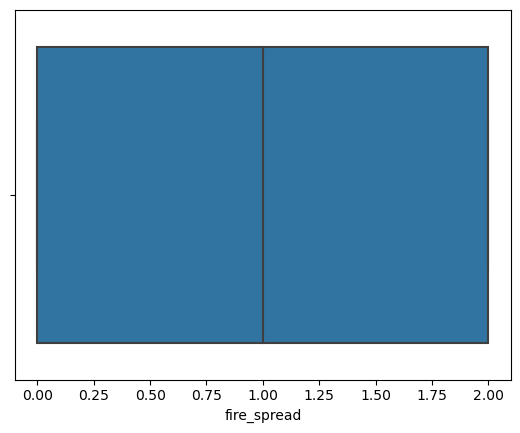

In [30]:
#Make seperate histograms to see distribution
sns.boxplot(data= clean_data, x ='fire_spread') 

<Axes: xlabel='DMC'>

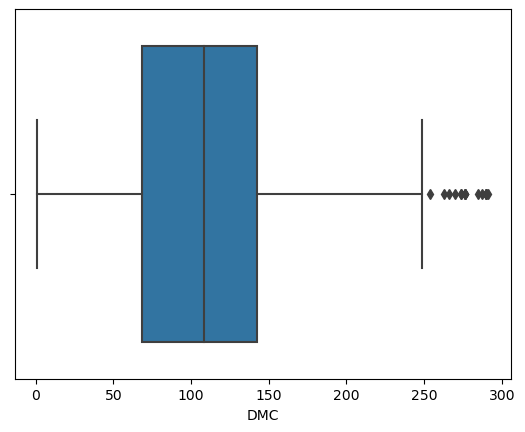

In [31]:
sns.boxplot(data= clean_data, x= 'DMC') 

<Axes: xlabel='DC'>

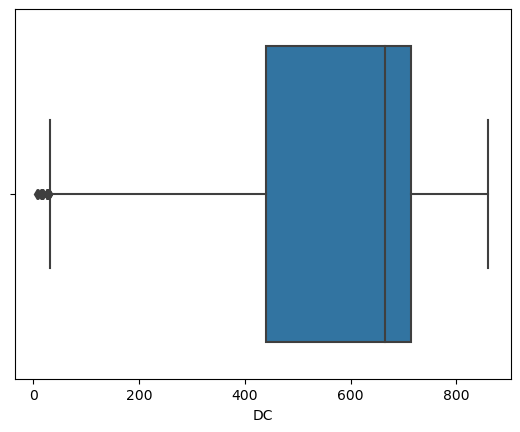

In [32]:
sns.boxplot(data= clean_data, x ='DC') 

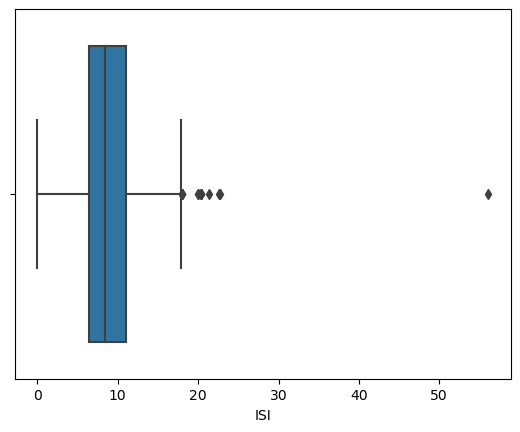

In [33]:
sns.boxplot(data= clean_data, x ='ISI') 

#Look into outlier point
clean_data.loc[clean_data['ISI']>30]

#remove outlier
cleaned_data =  clean_data.drop(clean_data[(clean_data['ISI']==56.1)&(clean_data['FFMC']==94.3) & (clean_data['DMC'] ==96.3)].index)

<Axes: xlabel='RH'>

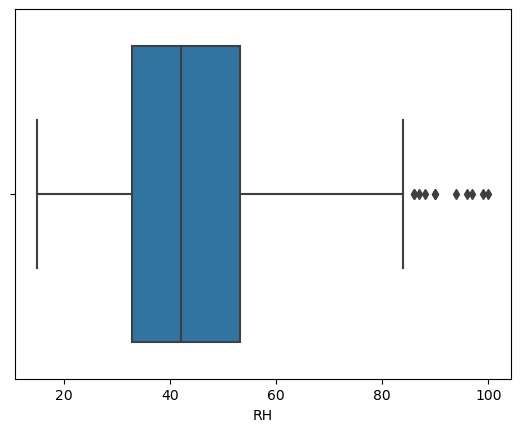

In [34]:
sns.boxplot(data= cleaned_data, x ='RH') 

<Axes: xlabel='wind'>

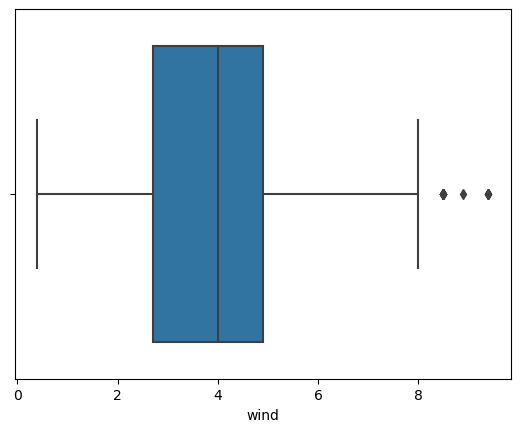

In [35]:
sns.boxplot(data= cleaned_data, x= 'wind') 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num,area_squared_km,fire_spread
499,7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82,8,1,0.1082,2


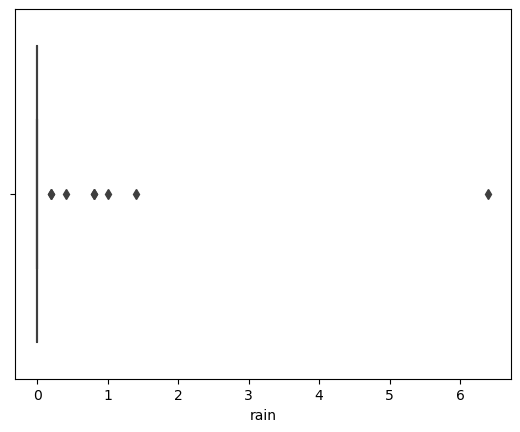

In [36]:
sns.boxplot(data= cleaned_data, x ='rain') 

#look into outlier
cleaned_data.loc[cleaned_data['rain']>6]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num,area_squared_km,fire_spread
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,9,5,10.9084,2


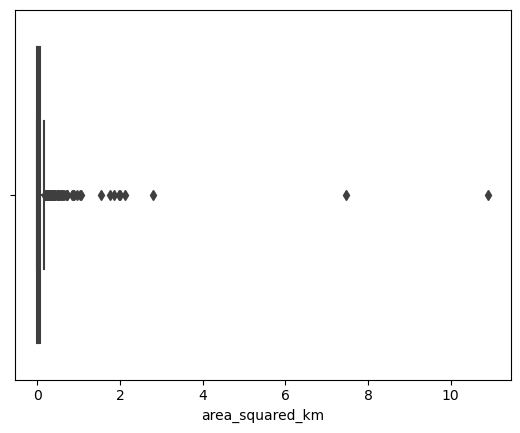

In [37]:
sns.boxplot(data= cleaned_data, x= 'area_squared_km') 

#look into outlier
cleaned_data.loc[cleaned_data['area_squared_km']>10]

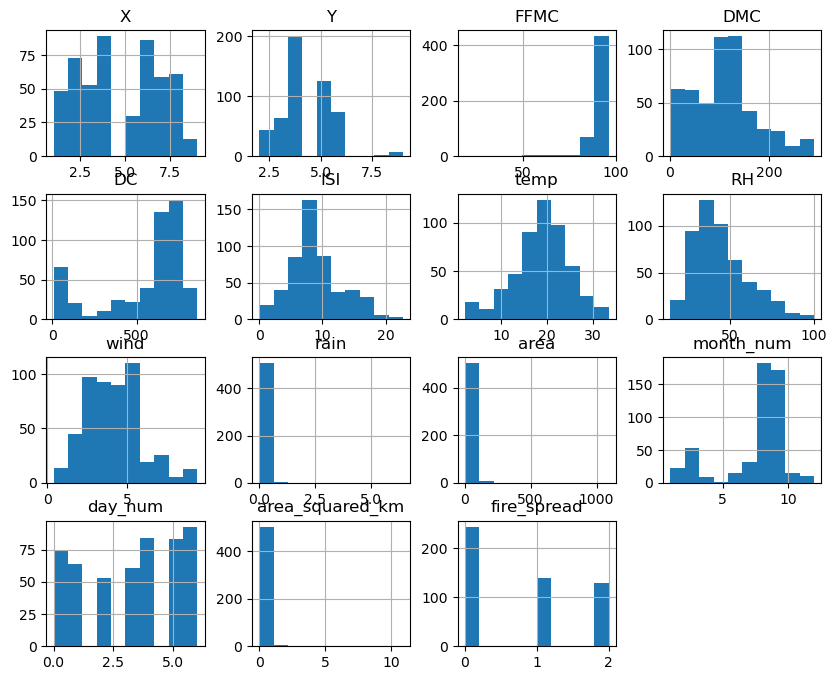

In [38]:
#Quick histogram overview
cleaned_data.hist(figsize=(10, 8))  
plt.show()

In [124]:
cleaned_data.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num,area_squared_km,fire_spread
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,8,6,0.0644,1
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,8,6,0.5429,2
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,8,6,0.1116,2
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,8,5,0.0000,0
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,11,1,0.0000,0


In [39]:
cleaned_data.to_csv('../Data/forest_fire_clean.csv', index=False)

# orgainzing data grouped by month

- adding count of large fire spread to dataframe

In [50]:
cleaned_data_plus_large_count=clean_data

In [52]:
cleaned_data_plus_large_count['large_fire_check']=cleaned_data_plus_large_count['fire_spread']==2

In [55]:
large_fires_by_month=cleaned_data_plus_large_count.groupby('month')['large_fire_check'].sum()

In [61]:
large_fires_by_month=pd.DataFrame(large_fires_by_month).reset_index()

In [62]:
large_fires_by_month

,month,large_fire_check
0,apr,2
1,aug,38
2,dec,8
3,feb,5
4,jan,0
5,jul,8
6,jun,3
7,mar,11
8,may,1
9,nov,0


In [90]:
large_fires_by_month['rank_count_large_fires']=large_fires_by_month['large_fire_check'].rank(method='first')

In [91]:
large_fires_by_month

,month,large_fire_check,rank_count_large_fires
0,apr,2,4.0
1,aug,38,11.0
2,dec,8,8.0
3,feb,5,7.0
4,jan,0,1.0
5,jul,8,9.0
6,jun,3,5.0
7,mar,11,10.0
8,may,1,3.0
9,nov,0,2.0


In [92]:
cleaned_data_plus_large_count=pd.merge(cleaned_data_plus_large_count, large_fires_by_month, on='month', how='inner')

In [93]:
cleaned_data_plus_large_count.drop('large_fire_check_x', axis=1,inplace=True)

KeyError: "['large_fire_check_x'] not found in axis"

In [94]:
cleaned_data_plus_large_count.rename(columns ={'large_fire_check_y':'large_fire_month_total'}, inplace=True)

Create a column F that is the number of large fires in the month divided by the total fires

In [95]:
cleaned_data_plus_large_count['F']=cleaned_data_plus_large_count['large_fire_month_total']/513

In [97]:
cleaned_data_plus_large_count.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,rain,area,month_num,day_num,area_squared_km,fire_spread,large_fire_month_total,F,large_fire_check,rank_count_large_fires
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,0.0,0.0,3,4,0.0,0,11,0.021442,11,10.0
1,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,0.2,0.0,3,4,0.0,0,11,0.021442,11,10.0
2,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,0.0,0.0,3,6,0.0,0,11,0.021442,11,10.0
3,5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,...,0.0,0.0,3,5,0.0,0,11,0.021442,11,10.0
4,6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,...,0.0,0.0,3,2,0.0,0,11,0.021442,11,10.0


In [98]:
cleaned_data_plus_large_count.drop('large_fire_check', axis=1,inplace=True)

In [99]:
cleaned_data_plus_large_count.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num,area_squared_km,fire_spread,large_fire_month_total,F,rank_count_large_fires
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,4,0.0,0,11,0.021442,10.0
1,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,4,0.0,0,11,0.021442,10.0
2,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,6,0.0,0,11,0.021442,10.0
3,5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,5.4,0.0,0.0,3,5,0.0,0,11,0.021442,10.0
4,6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,4.0,0.0,0.0,3,2,0.0,0,11,0.021442,10.0


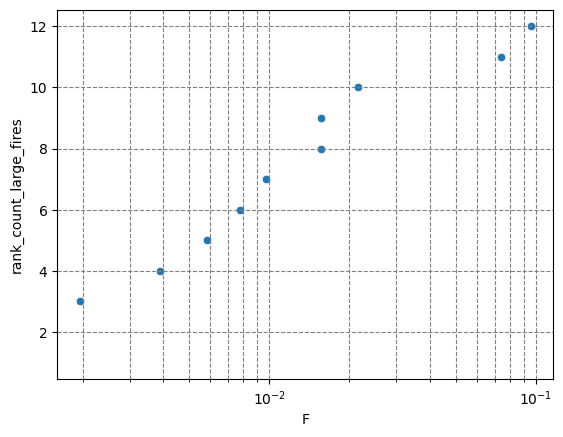

In [102]:

sns.scatterplot(data=cleaned_data_plus_large_count, x=cleaned_data_plus_large_count['F'], y=cleaned_data_plus_large_count['rank_count_large_fires'])
plt.xscale('log')
plt.grid(True,which="both",ls="--",c='gray')
plt.show()

Normal: 
t = p + o@-'F(t) = p + az, 
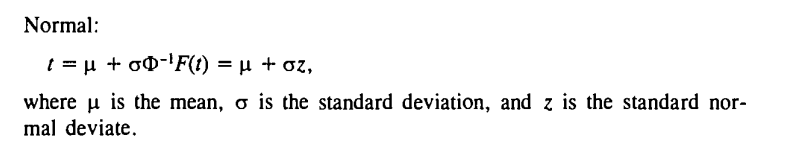where p is the mean, a is the standard deviation, and z is the standard normal deviate

In [110]:
cleaned_data_plus_large_count['normal_model']=(cleaned_data_plus_large_count['large_fire_month_total'].mean())+((cleaned_data_plus_large_count['large_fire_month_total'].std())*stats.zscore(cleaned_data_plus_large_count['large_fire_month_total']))

In [112]:
cleaned_data_plus_large_count.drop('normal_modal',axis=1,inplace=True)

In [113]:
cleaned_data_plus_large_count.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,rain,area,month_num,day_num,area_squared_km,fire_spread,large_fire_month_total,F,rank_count_large_fires,normal_model
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,0.0,0.0,3,4,0.0,0,11,0.021442,10.0,10.979375
1,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,0.2,0.0,3,4,0.0,0,11,0.021442,10.0,10.979375
2,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,0.0,0.0,3,6,0.0,0,11,0.021442,10.0,10.979375
3,5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,...,0.0,0.0,3,5,0.0,0,11,0.021442,10.0,10.979375
4,6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,...,0.0,0.0,3,2,0.0,0,11,0.021442,10.0,10.979375


In [116]:
cleaned_data_plus_large_count['month_z_score']=stats.zscore(cleaned_data_plus_large_count['large_fire_month_total'])

In [118]:
cleaned_data_plus_large_count['mean_large_fires']=cleaned_data_plus_large_count['large_fire_month_total'].mean()
cleaned_data_plus_large_count['std_large_fires']=cleaned_data_plus_large_count['large_fire_month_total'].std()

In [120]:
cleaned_data_plus_large_count.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,day_num,area_squared_km,fire_spread,large_fire_month_total,F,rank_count_large_fires,normal_model,month_z_score,mean_large_fires,std_large_fires
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,4,0.0,0,11,0.021442,10.0,10.979375,-1.211231,32.130604,17.462586
1,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,4,0.0,0,11,0.021442,10.0,10.979375,-1.211231,32.130604,17.462586
2,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,6,0.0,0,11,0.021442,10.0,10.979375,-1.211231,32.130604,17.462586
3,5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,...,5,0.0,0,11,0.021442,10.0,10.979375,-1.211231,32.130604,17.462586
4,6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,...,2,0.0,0,11,0.021442,10.0,10.979375,-1.211231,32.130604,17.462586


In [121]:
cleaned_data_plus_large_count['normal_model_F']=cleaned_data_plus_large_count['normal_model']/513

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


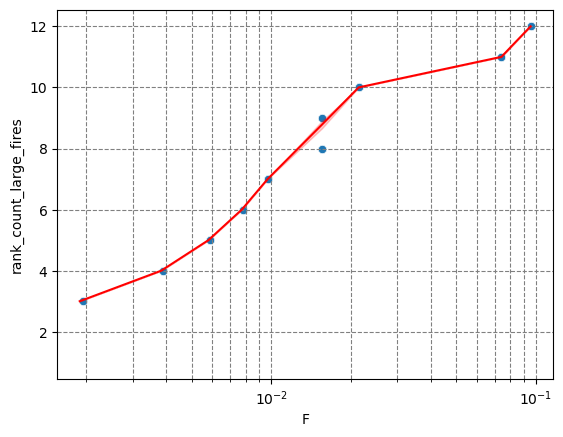

In [122]:


# Scatterplot
sns.scatterplot(data=cleaned_data_plus_large_count, x='F', y='rank_count_large_fires')
plt.xscale('log')
plt.grid(True, which="both", ls="--", c='gray')

# Lineplot using data from 'line_column'
sns.lineplot(data=cleaned_data_plus_large_count, x='normal_model_F', y='rank_count_large_fires', color='red')

plt.show()


In [123]:
cleaned_data_plus_large_count['month_z_score'].unique()

array([-1.21123127, -1.61247956,  0.33644071,  0.96697374, -1.72712193,
       -1.66980074, -1.38319482, -1.55515837, -1.84176429, -1.78444311])

adding a column for total fires in the month

# orgainzing data grouped by month

- adding count of large fire spread to dataframe

In [50]:
cleaned_data_plus_large_count=clean_data

In [52]:
cleaned_data_plus_large_count['large_fire_check']=cleaned_data_plus_large_count['fire_spread']==2

In [55]:
large_fires_by_month=cleaned_data_plus_large_count.groupby('month')['large_fire_check'].sum()

In [61]:
large_fires_by_month=pd.DataFrame(large_fires_by_month).reset_index()

In [62]:
large_fires_by_month

,month,large_fire_check
0,apr,2
1,aug,38
2,dec,8
3,feb,5
4,jan,0
5,jul,8
6,jun,3
7,mar,11
8,may,1
9,nov,0


In [90]:
large_fires_by_month['rank_count_large_fires']=large_fires_by_month['large_fire_check'].rank(method='first')

In [91]:
large_fires_by_month

,month,large_fire_check,rank_count_large_fires
0,apr,2,4.0
1,aug,38,11.0
2,dec,8,8.0
3,feb,5,7.0
4,jan,0,1.0
5,jul,8,9.0
6,jun,3,5.0
7,mar,11,10.0
8,may,1,3.0
9,nov,0,2.0


In [92]:
cleaned_data_plus_large_count=pd.merge(cleaned_data_plus_large_count, large_fires_by_month, on='month', how='inner')

In [93]:
cleaned_data_plus_large_count.drop('large_fire_check_x', axis=1,inplace=True)

KeyError: "['large_fire_check_x'] not found in axis"

In [94]:
cleaned_data_plus_large_count.rename(columns ={'large_fire_check_y':'large_fire_month_total'}, inplace=True)

Create a column F that is the number of large fires in the month divided by the total fires

In [95]:
cleaned_data_plus_large_count['F']=cleaned_data_plus_large_count['large_fire_month_total']/513

In [97]:
cleaned_data_plus_large_count.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,rain,area,month_num,day_num,area_squared_km,fire_spread,large_fire_month_total,F,large_fire_check,rank_count_large_fires
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,0.0,0.0,3,4,0.0,0,11,0.021442,11,10.0
1,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,0.2,0.0,3,4,0.0,0,11,0.021442,11,10.0
2,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,0.0,0.0,3,6,0.0,0,11,0.021442,11,10.0
3,5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,...,0.0,0.0,3,5,0.0,0,11,0.021442,11,10.0
4,6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,...,0.0,0.0,3,2,0.0,0,11,0.021442,11,10.0


In [98]:
cleaned_data_plus_large_count.drop('large_fire_check', axis=1,inplace=True)

In [99]:
cleaned_data_plus_large_count.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_num,day_num,area_squared_km,fire_spread,large_fire_month_total,F,rank_count_large_fires
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,3,4,0.0,0,11,0.021442,10.0
1,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,3,4,0.0,0,11,0.021442,10.0
2,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,3,6,0.0,0,11,0.021442,10.0
3,5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,5.4,0.0,0.0,3,5,0.0,0,11,0.021442,10.0
4,6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,4.0,0.0,0.0,3,2,0.0,0,11,0.021442,10.0


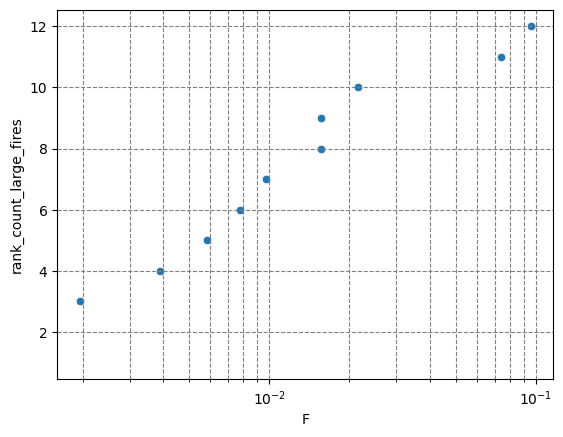

In [102]:

sns.scatterplot(data=cleaned_data_plus_large_count, x=cleaned_data_plus_large_count['F'], y=cleaned_data_plus_large_count['rank_count_large_fires'])
plt.xscale('log')
plt.grid(True,which="both",ls="--",c='gray')
plt.show()

Normal: 
t = p + o@-'F(t) = p + az, 
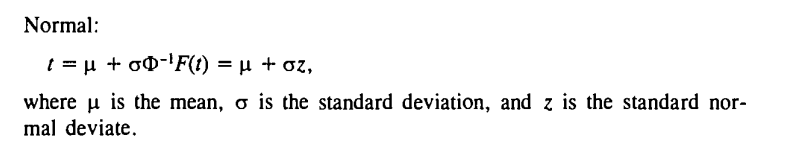where p is the mean, a is the standard deviation, and z is the standard normal deviate

In [110]:
cleaned_data_plus_large_count['normal_model']=(cleaned_data_plus_large_count['large_fire_month_total'].mean())+((cleaned_data_plus_large_count['large_fire_month_total'].std())*stats.zscore(cleaned_data_plus_large_count['large_fire_month_total']))

In [112]:
cleaned_data_plus_large_count.drop('normal_modal',axis=1,inplace=True)

In [113]:
cleaned_data_plus_large_count.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,rain,area,month_num,day_num,area_squared_km,fire_spread,large_fire_month_total,F,rank_count_large_fires,normal_model
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,0.0,0.0,3,4,0.0,0,11,0.021442,10.0,10.979375
1,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,0.2,0.0,3,4,0.0,0,11,0.021442,10.0,10.979375
2,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,0.0,0.0,3,6,0.0,0,11,0.021442,10.0,10.979375
3,5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,...,0.0,0.0,3,5,0.0,0,11,0.021442,10.0,10.979375
4,6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,...,0.0,0.0,3,2,0.0,0,11,0.021442,10.0,10.979375


In [116]:
cleaned_data_plus_large_count['month_z_score']=stats.zscore(cleaned_data_plus_large_count['large_fire_month_total'])

In [118]:
cleaned_data_plus_large_count['mean_large_fires']=cleaned_data_plus_large_count['large_fire_month_total'].mean()
cleaned_data_plus_large_count['std_large_fires']=cleaned_data_plus_large_count['large_fire_month_total'].std()

In [120]:
cleaned_data_plus_large_count.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,day_num,area_squared_km,fire_spread,large_fire_month_total,F,rank_count_large_fires,normal_model,month_z_score,mean_large_fires,std_large_fires
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,4,0.0,0,11,0.021442,10.0,10.979375,-1.211231,32.130604,17.462586
1,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,4,0.0,0,11,0.021442,10.0,10.979375,-1.211231,32.130604,17.462586
2,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,6,0.0,0,11,0.021442,10.0,10.979375,-1.211231,32.130604,17.462586
3,5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,...,5,0.0,0,11,0.021442,10.0,10.979375,-1.211231,32.130604,17.462586
4,6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,...,2,0.0,0,11,0.021442,10.0,10.979375,-1.211231,32.130604,17.462586


In [121]:
cleaned_data_plus_large_count['normal_model_F']=cleaned_data_plus_large_count['normal_model']/513

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


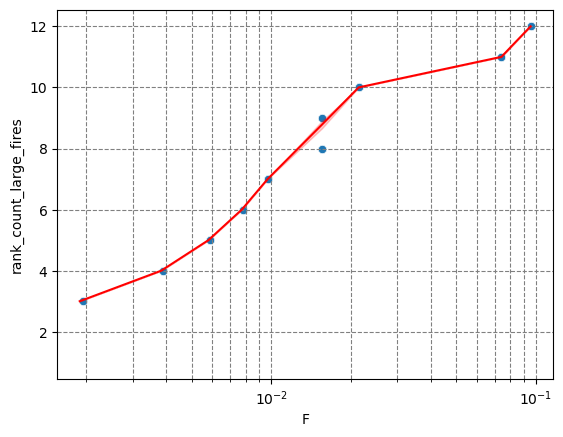

In [122]:


# Scatterplot
sns.scatterplot(data=cleaned_data_plus_large_count, x='F', y='rank_count_large_fires')
plt.xscale('log')
plt.grid(True, which="both", ls="--", c='gray')

# Lineplot using data from 'line_column'
sns.lineplot(data=cleaned_data_plus_large_count, x='normal_model_F', y='rank_count_large_fires', color='red')

plt.show()


In [123]:
cleaned_data_plus_large_count['month_z_score'].unique()

array([-1.21123127, -1.61247956,  0.33644071,  0.96697374, -1.72712193,
       -1.66980074, -1.38319482, -1.55515837, -1.84176429, -1.78444311])

adding a column for total fires in the month

## - `X` `Y` spatial coordinates within the Montesinho park map: 1 to 9

## - `month` - month of the year: "jan" to "dec"

## - `day` - day of the week: "mon" to "sun"

## - `fire indexes` four different fire weather indexes 

## - `temp` - temperature in Celsius degrees: 2.2 to 33.30

## - `RH` - relative humidity in %: 15.0 to 100

## - `wind` - wind speed in km/h: 0.40 to 9.40

## - `rain` - outside rain in mm/m2: 0.0 to 6.4

## - `area` - the burned area of the forest (in ha): 0.00 to 1090.84


## Important properties of the dataset:
    - variables are only entered when there is a fire
    - We have month variable but not year variable, so we can't look at trends over time
    - If we had the same data for days there were no fires, there would be more questions we could answer

## So what might we predict?
    - how frequent fires are by month/season?
    - Fire size chance of any given fire will be a large fire

## For a variable to predict large fires... 
    - an increase in the variable must increase the size of fires while also not increasing number of small fires...



How are these variables related to the area of forest fires?
What can we suggest to tourists and the fire department?  Data
First, how are forest fires distributed in the park.